# Préparation du dataset

## Import du dataset du fichier csv avec les descriptions des produits 

In [9]:
import pandas as pd
import os

# Define relative path
file_path = os.path.join("..", "data", "flipkart_com-ecommerce_sample_1050.csv")

# Load the CSV in a DataFrame
df = pd.read_csv(file_path)

# first lignes of the df
df.head()


uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

### Import du dataset des images sous forme de fichiers jpg

Image: 009099b1f6e1e8f893ec29a7023153c4.jpg
 - Dimensions: (687, 1162)
 - Mode: RGB
------------------------------
Image: 0096e89cc25a8b96fb9808716406fe94.jpg
 - Dimensions: (1478, 904)
 - Mode: RGB
------------------------------
Image: 00cbbc837d340fa163d11e169fbdb952.jpg
 - Dimensions: (1347, 326)
 - Mode: RGB
------------------------------
Image: 00d84a518e0550612fcfcba3b02b6255.jpg
 - Dimensions: (1100, 857)
 - Mode: RGB
------------------------------
Image: 00e966a5049a262cfc72e6bbf68b80e7.jpg
 - Dimensions: (962, 1100)
 - Mode: RGB
------------------------------
Image: 00ed03657cedbe4663eff2d7fa702a33.jpg
 - Dimensions: (788, 2430)
 - Mode: RGB
------------------------------


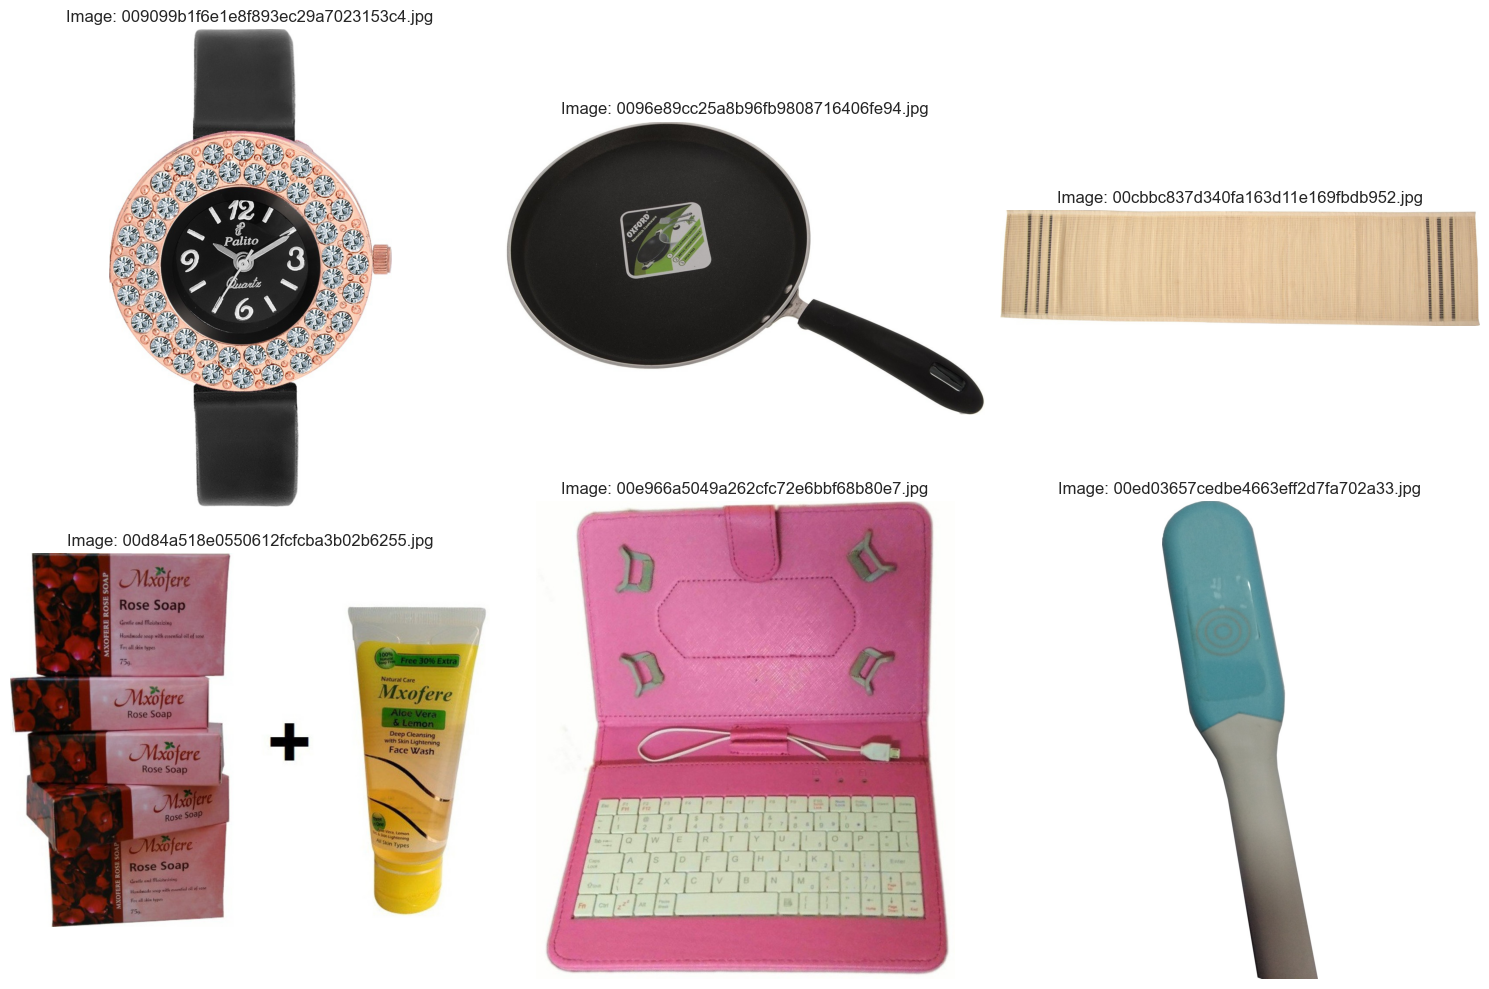

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the folder containing the images
images_folder = os.path.join("..", "data", "Images")

# List all files in the folder
image_files = os.listdir(images_folder)

# Select the first 6 images
selected_images = image_files[:6]

# Set up the figure to display 6 images (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Load and display information about each image
for i, image_name in enumerate(selected_images):
    image_path = os.path.join(images_folder, image_name)
    image = Image.open(image_path)
    
    # Display information about the image
    print(f"Image: {image_name}")
    print(f" - Dimensions: {image.size}")
    print(f" - Mode: {image.mode}")
    print("-" * 30)
    
    # Display the image in the grid
    ax = axes[i // 3, i % 3]
    ax.imshow(image)
    ax.set_title(f"Image: {image_name}")
    ax.axis('off')  # Turn off the axes for better presentation

# Display the grid
plt.tight_layout()
plt.show()



## Pré-traitement des images

### Recuperation de la première catégorie de produits

In [11]:
# Display the unique values in the 'product_category_tree' column
df['product_category_tree'].unique()

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
       '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
       '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
       '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
       '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
       '["Watches >> Wrist Watches >> T

In [12]:
# Extract the first category from the 'product_category_tree' column
df['category'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0][2:-1])
# Put category in lowercase and in a list
df['category'] = df['category'].apply(lambda x: x.lower())
# Display the unique values in the 'category' column
df['category'].unique()

array(['home furnishing', 'baby care', 'watches',
       'home decor & festive needs', 'kitchen & dining',
       'beauty and personal care', 'computers'], dtype=object)

In [13]:
# Display the first few rows of the DataFrame
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications         category  
0  {"product_specification"=>[{"key"=>"Brand", "v...  home furnishing  
1  {"product_specification"=>[{"key"=>"Machine Wa...        baby care  
2  {"product_specification"=>[{"key"=>"Material",...        baby care  
3  {"product_specification"=>[{"key"=>"Brand", "v...  home furnishing  
4  {"product_specification"=>[{"key"=>"Machine Wa...  home furnishing

### Création du dataframe pour les traitements des images

In [14]:
# Create a new DataFrame with the 'image' and 'category' columns
df_images = df.copy()
df_images = df_images[['image', 'category']]
df_images.head()

image         category
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  home furnishing
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        baby care
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        baby care
3  d4684dcdc759dd9cdf41504698d737d8.jpg  home furnishing
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  home furnishing

### Création des labels pour les catégories

In [15]:
from sklearn import preprocessing

# Initialize the label encoder
le = preprocessing.LabelEncoder()

# Fit and transform the 'category' column to create a new 'label' column
df_images['label'] = le.fit_transform(df_images['category'])

# Display the updated DataFrame with the new 'label' column
df_images.head()

image         category  label
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  home furnishing      4
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        baby care      0
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        baby care      0
3  d4684dcdc759dd9cdf41504698d737d8.jpg  home furnishing      4
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  home furnishing      4

### Affichage d'exemples d'images par catégorie

Category: home furnishing


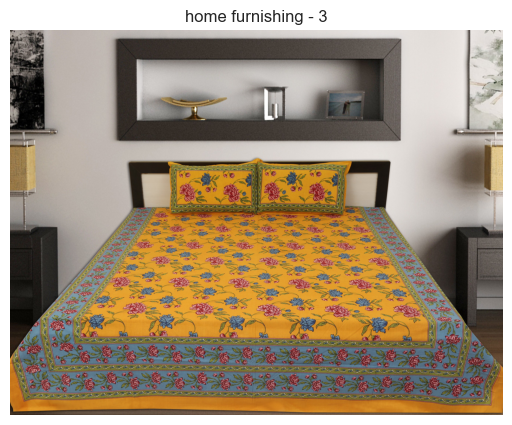

Category: baby care


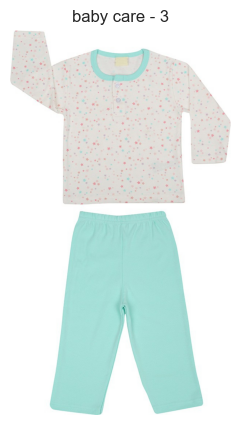

Category: watches


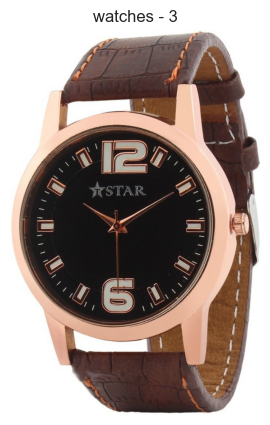

Category: home decor & festive needs


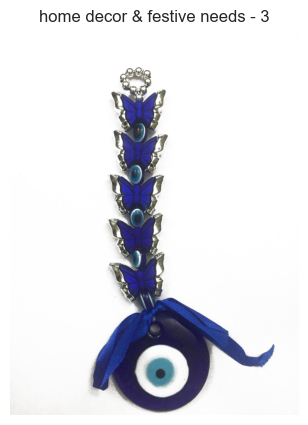

Category: kitchen & dining


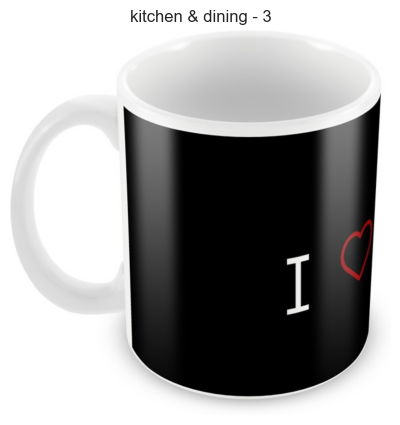

Category: beauty and personal care


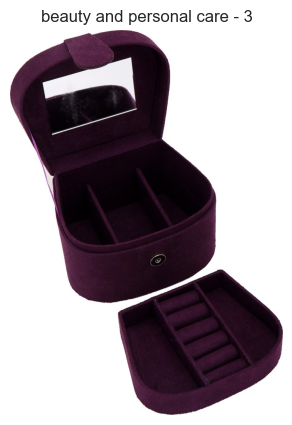

Category: computers


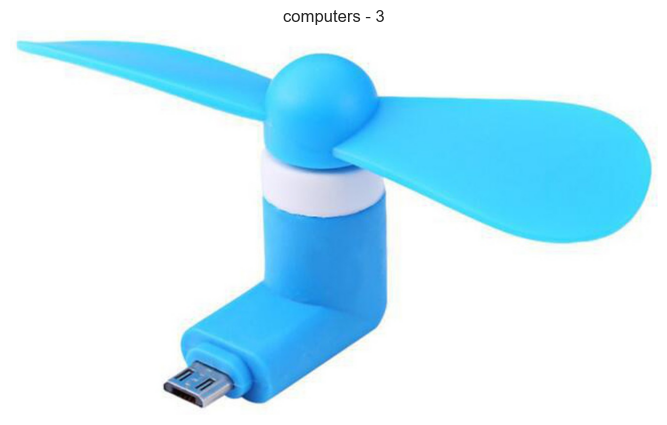

In [16]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os

# Define the relative path to the images directory
base_path = os.path.join("..", "data", "Images")

# Function to get the list of image filenames for a given category
def get_images_by_category(category_name):
    return df_images[df_images['category'] == category_name]['image'].tolist() # tolist() to return a list on which we can iterate easily

# List of unique categories
categories = df_images['category'].unique() # unique() to get the unique values

# Display examples of images by category
for category in categories:
    print(f"Category: {category}")
    
    # Get the list of image filenames for this category
    images_list = get_images_by_category(category)
    
    # Display up to 3 images from this category
    plt.figure(figsize=(15, 5))
    for i in range(min(3, len(images_list))):
        # Construct the full relative path to the image file
        image_file = os.path.join(base_path, images_list[i])
        if os.path.exists(image_file):  # Check if the file exists
            image = imread(image_file)
            plt.imshow(image)
            plt.title(f"{category} - {i+1}")
            plt.axis('off')
        else:
            print(f"File not found: {image_file}")
    plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir
import os

# Define the relative path to the images directory from the current notebook location
path = os.path.join("..", "data", "Images")

# List all files in the Images directory
list_photos = [file for file in listdir(path)]

# Print the number of photos found
print(len(list_photos))

# Optionally, display the first few file names to verify
print(list_photos[:5])


1050
['009099b1f6e1e8f893ec29a7023153c4.jpg', '0096e89cc25a8b96fb9808716406fe94.jpg', '00cbbc837d340fa163d11e169fbdb952.jpg', '00d84a518e0550612fcfcba3b02b6255.jpg', '00e966a5049a262cfc72e6bbf68b80e7.jpg']


### Nombre de photos par catégorie

In [18]:
from sklearn import preprocessing

# Initialize the label encoder
le = preprocessing.LabelEncoder()

# Fit and transform the 'category' column to create a new 'label' column
df_images['label'] = le.fit_transform(df_images['category'])

# Display the updated DataFrame with the new 'label' column
df_images.head()



image         category  label
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  home furnishing      4
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        baby care      0
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        baby care      0
3  d4684dcdc759dd9cdf41504698d737d8.jpg  home furnishing      4
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  home furnishing      4

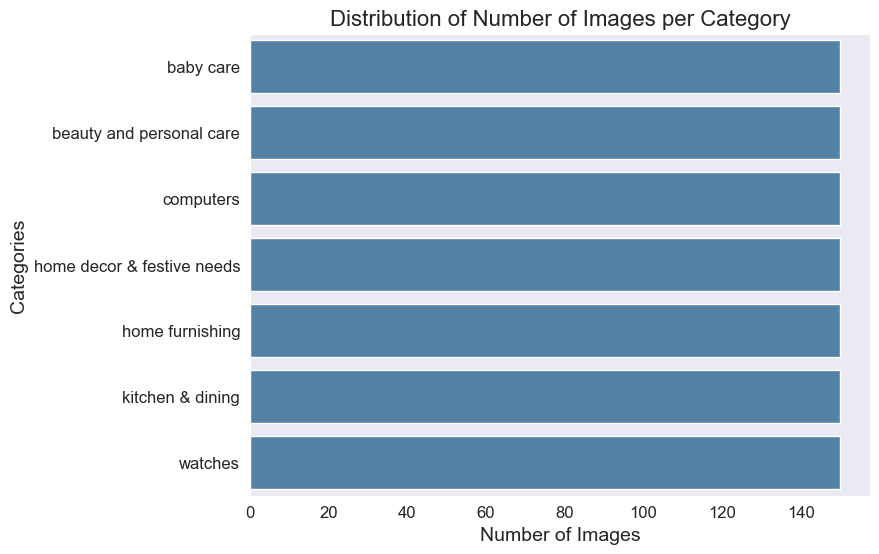

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categories and count the number of images per category
df_images_par_cat = df_images.groupby(['category', 'label']).agg({'image': 'count'}).reset_index()

# Plotting the number of images per category
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(y=df_images_par_cat['category'], x=df_images_par_cat['image'], 
            data=df_images_par_cat, color='SteelBlue')

# Add title and labels
plt.title("Distribution of Number of Images per Category", fontsize=16)
plt.xlabel("Number of Images", fontsize=14)
plt.ylabel("Categories", fontsize=14)

# Adjust the tick label size
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Remove the grid for a cleaner look
plt.grid(False)

# Display the plot
plt.show()


## Création des labels des photos à partir du nom des images

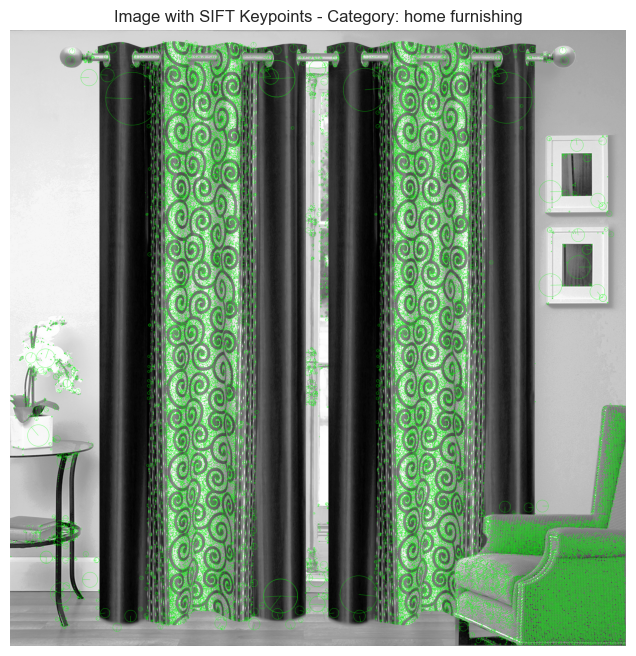

Descriptors shape:  (98204, 128)
Descriptors: 
 [[  0.   0.   0. ...   0.   0.   0.]
 [  7.   0.   0. ...   3.   0.   7.]
 [ 12.   6.   3. ...   4.   0.   0.]
 ...
 [113.  43.  54. ...   0.   0.   0.]
 [ 33.  14.   3. ...  16.   5.   3.]
 [ 57.  32. 118. ...   0.   0.   0.]]


In [20]:
import cv2
import matplotlib.pyplot as plt
import os

# Use the relative path defined earlier
base_path = os.path.join("..", "data", "Images")

# Default category set to "home furnishing"
category_name = 'home furnishing'

# Function to get the list of image filenames for the default category
def get_images_by_category(category_name):
    return df_images[df_images['category'] == category_name]['image'].tolist()

# Retrieve images for the default category
image_names = get_images_by_category(category_name)

# Check if there are any images in the selected category
if not image_names:
    raise ValueError(f"No images found for category: {category_name}")

# Load and preprocess the first image from the category
image_path = os.path.join(base_path, image_names[0])
image = cv2.imread(image_path, 0)  # Read the image in grayscale
if image is None:
    raise ValueError(f"Image not found or unable to load: {image_path}")

image = cv2.equalizeHist(image)  # Equalize the histogram of the image

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp, des = sift.detectAndCompute(image, None)

# Customize keypoint drawing parameters
keypoint_image = cv2.drawKeypoints(
    image, kp, None, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(0, 255, 0)  # Set keypoint color to bright green
)

# Display the image with keypoints
plt.figure(figsize=(8, 8))
plt.imshow(keypoint_image, cmap='gray')
plt.title(f'Image with SIFT Keypoints - Category: {category_name}')
plt.axis('off')
plt.show()

# Print the shape of the descriptors and the descriptors themselves
print("Descriptors shape: ", des.shape)
print("Descriptors: \n", des)


## Détermination et affichage des descripteurs SIFT

- l'image contient 98204 descripteurs SIFT 
- les descripteurs sont des vecteurs de 128 valeurs

# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [21]:
import cv2
import time
import numpy as np
import os

# Initialize an empty list to store the SIFT descriptors for each image
sift_keypoints_by_img = []

# Record the start time for performance monitoring
start_time = time.time()

# Initialize the SIFT detector with a limit of 500 keypoints
sift = cv2.SIFT_create(500)

# Loop over all the images in the dataset
for image_num in range(len(list_photos)):
    if image_num % 100 == 0: # Print a message every 100 images
        print(f"Processing image {image_num}/{len(list_photos)}") # Display the current image number
    
    # Load the image in grayscale
    image = cv2.imread(os.path.join(path, list_photos[image_num]), 0) # 0 for grayscale
    
    # Equalize the histogram of the image to enhance contrast
    res = cv2.equalizeHist(image) 
    
    # Detect keypoints and compute descriptors using SIFT
    kp, des = sift.detectAndCompute(res, None) # kp = keypoints, des = descriptors
    
    # Append the computed descriptors to the list if they are not None
    if des is not None: 
        sift_keypoints_by_img.append(des)  # Store descriptors for each image separately

# Concatenate all descriptors into a single array for clustering, sift_keypoints_by_img is a list of arrays
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0) # axis=0 to concatenate along rows

# Print the total number of descriptors
print(f"Number of descriptors: {sift_keypoints_all.shape}")

# Record the end time and calculate the duration
duration = time.time() - start_time
print(f"SIFT descriptor processing time: {duration:.2f} seconds")


Processing image 0/1050
Processing image 100/1050
Processing image 200/1050
Processing image 300/1050
Processing image 400/1050
Processing image 500/1050
Processing image 600/1050
Processing image 700/1050
Processing image 800/1050
Processing image 900/1050
Processing image 1000/1050
Number of descriptors: (517351, 128)
SIFT descriptor processing time: 352.34 seconds


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [22]:
from sklearn import cluster
import time

# Record the start time for clustering performance monitoring
start_time = time.time()

# Estimate the number of clusters (k) using the square root of the total number of descriptors
k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print(f"Estimated number of clusters: {k}")
print(f"Creating {k} clusters of descriptors...")

# Perform MiniBatchKMeans clustering on the SIFT descriptors with explicit n_init
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0, n_init='auto') # n_init='auto' to avoid warnings and init_size=3*k for better performance, 3*k means 3 times the number of clusters
kmeans.fit(sift_keypoints_all) # Fit the k-means model to the data

# Calculate and display the duration of the clustering process
duration = time.time() - start_time # Calculate the duration
print(f"KMeans processing time: {duration:.2f} seconds")


Estimated number of clusters: 719
Creating 719 clusters of descriptors...
KMeans processing time: 8.19 seconds


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [23]:
import numpy as np
import time

start_time = time.time()

def build_histogram(kmeans, des, image_num):
    """Builds a histogram for a single image based on the k-means clusters."""
    res = kmeans.predict(des)  # Predict the cluster for each descriptor
    hist = np.zeros(len(kmeans.cluster_centers_))  # Initialize the histogram with zeros, cluster_centers_ = centroids
    nb_des = len(des) # Number of descriptors
    
    # Check if the image has no descriptors
    if nb_des == 0: # If there are no descriptors, print a message
        print(f"Issue with histogram for image number: {image_num}")
    
    # Count the number of descriptors falling into each cluster (visual word)
    for i in res: # For each cluster index in the predictions
        hist[i] += 1.0 / nb_des  # Normalize the histogram by the number of descriptors, e.g., 1/10 for 10 descriptors
    
    return hist # Return the histogram for the image

# Create histograms for all images in the dataset
hist_vectors = [] # Initialize an empty list to store the histograms

for i, image_desc in enumerate(sift_keypoints_by_img):  # Use the correct variable name
    if i % 100 == 0: # Print a message every 100 images
        print(f"Processing image {i}/{len(sift_keypoints_by_img)}") # Display the current image number
    
    # Build the histogram for the current image and append it to the list
    hist = build_histogram(kmeans, image_desc, i) # Call the function to build the histogram, passing the k-means model, descriptors, and image number
    hist_vectors.append(hist) # Append the histogram to the list, hist is a list of counts for each cluster, e.g., [0, 0, 0, 1, 0, 0, ...]

# Convert the list of histograms into a NumPy array (this becomes our feature matrix for all images)
im_features = np.asarray(hist_vectors) 

# Measure the time taken to create the histograms
duration = time.time() - start_time
print(f"Histogram creation time: {duration:.2f} seconds")


Processing image 0/1050
Processing image 100/1050
Processing image 200/1050
Processing image 300/1050
Processing image 400/1050
Processing image 500/1050
Processing image 600/1050
Processing image 700/1050
Processing image 800/1050
Processing image 900/1050
Processing image 1000/1050
Histogram creation time: 2.29 seconds


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [24]:
from sklearn import manifold, decomposition

# Context: After creating histograms (feature vectors) for each image in our dataset using the Bag of Visual Words model,
# we now have a high-dimensional feature space. To make this dataset more manageable for machine learning tasks,
# we apply Principal Component Analysis (PCA) to reduce the dimensionality while retaining most of the variance in the data.

print("Dataset dimensions before PCA reduction: ", im_features.shape)

# Apply PCA to reduce dimensions while preserving 99% of the variance
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(im_features)

print("Dataset dimensions after PCA reduction: ", feat_pca.shape)


Dataset dimensions before PCA reduction:  (1050, 719)
Dataset dimensions after PCA reduction:  (1050, 498)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [25]:
from sklearn import manifold
import pandas as pd

# Apply t-SNE to the PCA-reduced features to further reduce dimensionality to 2 components for visualization
tsne = manifold.TSNE(n_components=2, perplexity=30, # Perplexity parameter balances local and global aspects
                     n_iter=2000, init='random', random_state=6) # Set a random seed for reproducibility, n_iter=2000 for better convergence
X_tsne = tsne.fit_transform(feat_pca) # Fit and transform the PCA-reduced features

# Create a DataFrame to hold the t-SNE results along with their corresponding image class labels
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_images["category"]  # Assuming 'df_images' contains the image labels in the 'category' column
print(df_tsne.shape) # Display the shape of the DataFrame

# Context: This DataFrame `df_tsne` can now be used to visualize the images in 2D space, 
# with each point representing an image and the color representing its class. 
# This visualization can help in understanding the separation between different categories based on their visual features.

C:\Users\pat\.conda\envs\P6q\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images
* Les catégories "cloudy" et "rain" sont partiellement séparées

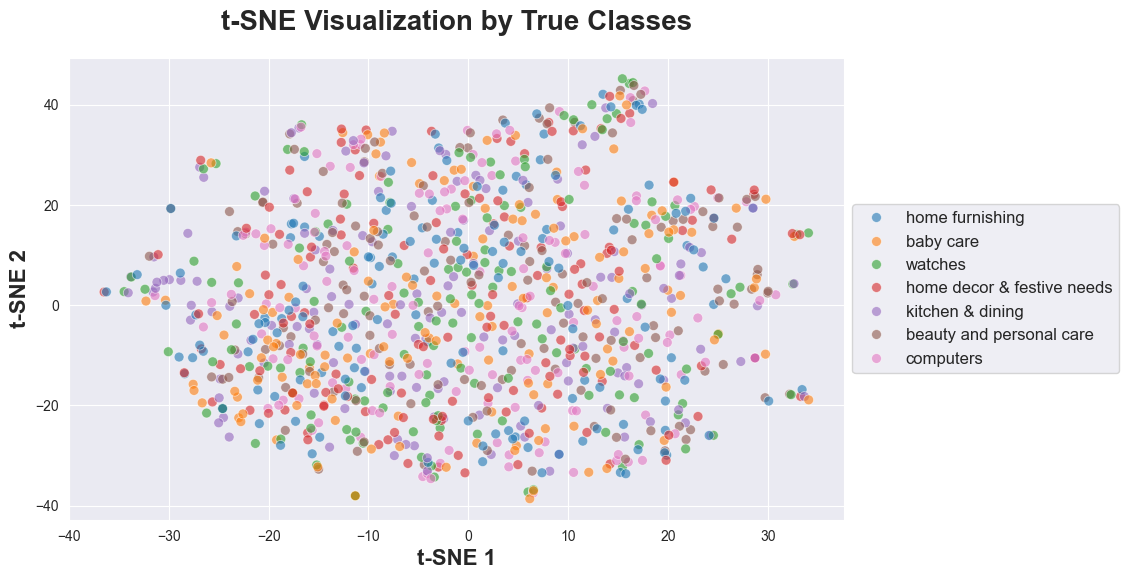

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Context: After reducing the dimensionality of our image feature vectors to two dimensions using t-SNE,
# we now want to visualize the distribution of images in this 2D space.
# Each point represents an image, and the points are colored according to the category (class) of the image.
# This visualization helps us understand how well-separated different categories are based on the visual features.

plt.figure(figsize=(10, 6))

# Scatter plot of the t-SNE results
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=len(df_tsne["class"].unique())), s=50, alpha=0.6)

# Set plot title and labels
plt.title('t-SNE Visualization by True Classes', fontsize=20, pad=20, fontweight='bold')
plt.xlabel('t-SNE 1', fontsize=16, fontweight='bold')
plt.ylabel('t-SNE 2', fontsize=16, fontweight='bold')

# Adjust legend size and position
plt.legend(prop={'size': 12}, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [27]:
from sklearn import cluster

# Context: After reducing the dimensionality of our feature space using t-SNE, 
# we now want to group the data into clusters to see if there are distinct groupings based on the features.
# We use the KMeans clustering algorithm for this task.

# Initialize the KMeans model with the desired number of clusters (4 in this case) and a fixed random state for reproducibility.
# The `n_init` parameter is set explicitly to 10 to avoid warnings about future changes in scikit-learn defaults.
cls = cluster.KMeans(n_clusters=4, random_state=6, n_init=10)

# Fit the KMeans model to the 2D t-SNE data
cls.fit(X_tsne)

# Add the resulting cluster labels to the DataFrame
df_tsne["cluster"] = cls.labels_

# Print the shape of the DataFrame to verify the addition of the new column
print(df_tsne.shape)


(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

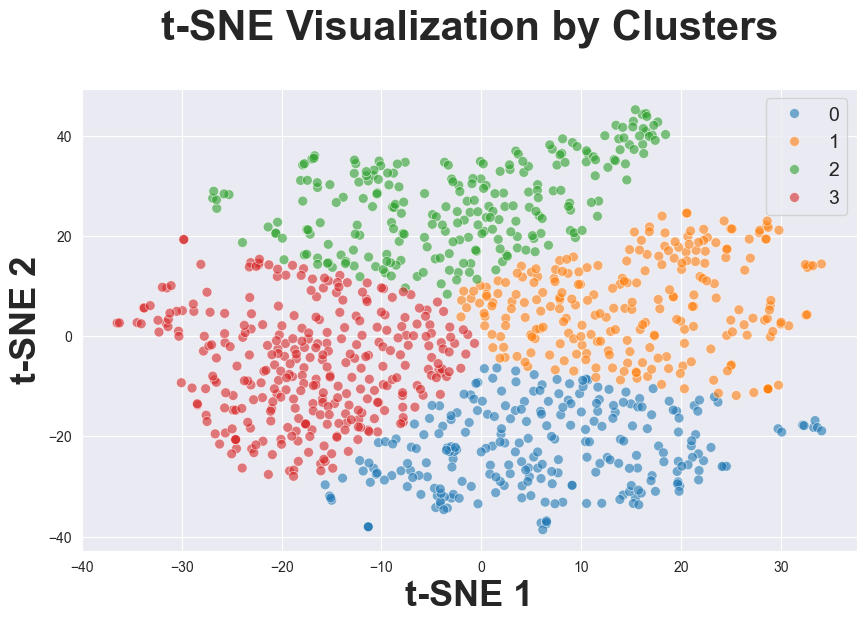

Adjusted Rand Index (ARI):  -0.0009093416854892274


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Context: After applying t-SNE to reduce our feature space to two dimensions and clustering the data using KMeans, 
# we now want to visualize how the images are grouped into clusters. 
# This visualization will help us understand if the clustering aligns with our expectations and if the clusters are distinct.

# Create a scatter plot to visualize the t-SNE results with the clusters
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",  # Use the cluster labels as the color/hue
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief"
)

# Set plot title and axis labels with custom styling
plt.title('t-SNE Visualization by Clusters', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('t-SNE 1', fontsize=26, fontweight='bold')
plt.ylabel('t-SNE 2', fontsize=26, fontweight='bold')

# Adjust the legend size and position
plt.legend(prop={'size': 14})

# Display the plot
plt.show()

# Context: We now want to evaluate the clustering performance using the Adjusted Rand Index (ARI).
# This metric will compare the clusters generated by KMeans with the true labels of the images.

# Assuming 'df_images' contains the true category labels in a column called 'category'
true_labels = df_images["category"]

# Calculate and print the Adjusted Rand Index (ARI) to evaluate the clustering
print("Adjusted Rand Index (ARI): ", metrics.adjusted_rand_score(true_labels, cls.labels_))


### Observations :

1. **Séparation des clusters** : Les clusters sont distincts, mais il y a un certain chevauchement, ce qui suggère des améliorations possibles dans l'extraction des caractéristiques ou les paramètres de clustering.

2. **Taille et distribution des clusters** : Les clusters varient en taille, indiquant différents niveaux de similarité au sein des catégories d'images.

3. **Score ARI** : Le score ARI très faible suggère que les clusters ne correspondent pas bien aux catégories réelles, ce qui indique un besoin de raffinement dans le processus de clustering ou l'extraction des caractéristiques.


### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne
* Cette transformation atteint ses limites pour les 2 catégories "shine" et "sunshine" qui sont peu séparées (donc elle a été réalisée manuellement au lieu d'utiliser la fonction "argmax")

In [29]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    248
1    245
2    240
3    317
Name: class, dtype: int64

In [30]:
from sklearn import metrics

# Use the numeric labels directly
true_labels = df_images["label"]  # These are now numeric labels
predicted_labels = cls.labels_  # Ensure these are also numeric labels

# Generate the confusion matrix by comparing the true labels with the cluster labels
conf_mat = metrics.confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print(conf_mat)



[[28 40 28 54  0  0  0]
 [32 41 37 40  0  0  0]
 [39 36 35 40  0  0  0]
 [37 35 36 42  0  0  0]
 [34 29 37 50  0  0  0]
 [36 31 33 50  0  0  0]
 [42 33 34 41  0  0  0]]


### Observations Basées sur la Matrice de Confusion

1. **Meilleure Répartition des Clusters** : Tous les clusters sont attribués à plusieurs catégories, ce qui indique une meilleure couverture et distribution par rapport à un modèle mal équilibré.

2. **Concentration des Catégories** : Certains clusters, comme le cluster 2, montrent une forte concentration sur les catégories 2 et 3. Cela pourrait suggérer que ces catégories partagent des caractéristiques similaires dans l'espace de features, rendant leur séparation difficile.

3. **Chevauchement Persistant** : Il existe encore un chevauchement où un même cluster est attribué à plusieurs catégories, ce qui peut indiquer des similitudes importantes entre ces catégories dans les données utilisées.

### Suggestions d'Amélioration

- **Améliorer l'extraction des features** pour mieux différencier les catégories similaires.
- **Réévaluer le nombre de clusters** pour voir si un autre paramétrage améliore la séparation.
- **Explorer des méthodes de clustering alternatives** ou l'optimisation des paramètres de réduction de dimensions pour affiner les résultats.

In [31]:
# Check the data types of true_labels and predicted_labels
print(f"Data type of true_labels: {true_labels.dtype}")
print(f"Data type of predicted_labels: {predicted_labels.dtype}")

# Display a few sample values from each for further inspection
print("\nSample values from true_labels:")
print(true_labels.head())

print("\nSample values from predicted_labels:")
print(predicted_labels[:5])  # Using slicing to get the first 5 elements



Data type of true_labels: int32
Data type of predicted_labels: int32

Sample values from true_labels:
0    4
1    0
2    0
3    4
4    4
Name: label, dtype: int32

Sample values from predicted_labels:
[2 3 2 3 1]


In [32]:
# Supposez que vous avez un DataFrame combinant les informations de `df_tsne` et `df_images`
df_combined = df_tsne.copy()
df_combined['label'] = df_images['label']  # Assurez-vous que les DataFrames sont correctement alignés

# Créez le tableau croisé dynamique
pivot_table = pd.pivot_table(df_combined, values='class', index='cluster', columns='label', aggfunc='count', fill_value=0)
print(pivot_table)


label     0   1   2   3   4   5   6
cluster                            
0        28  32  39  37  34  36  42
1        40  41  36  35  29  31  33
2        28  37  35  36  37  33  34
3        54  40  40  42  50  50  41


### Ajustement de la liste de correspondance des clusters aux classes en fonction de l'analyse de la table pivot
- Cluster 0 : label ou catégorie 4, car le cluster 0 contient le plus grand nombre d'images de la catégorie 4
- Cluster 1 : label ou catégorie 0, car le cluster 1 contient le plus grand nombre d'images de la catégorie 0
- Cluster 2 : label ou catégorie 3, car le cluster 2 contient le plus grand nombre d'images de la catégorie 3
- Cluster 3 : label ou catégorie 1, car le cluster 3 contient le plus grand nombre d'images de la catégorie 1 (cependant, il y a un chevauchement avec les catégories 5 et 6)

In [33]:
from sklearn import metrics
import pandas as pd
import numpy as np

# Define the cluster-to-class correspondence based on the analysis of the pivot table
corresp =[3,0,2,1]  # Correspondence based on the pivot table analysis


# Utilisez les labels numériques directement, pas besoin de convertir en string
true_labels = df_images['label']
predicted_labels = cls.labels_  # Assurez-vous que cls.labels_ contient les labels prédits numériques

# Define the function to handle the transformation based on the confusion matrix
def conf_mat_transform(y_true, y_pred):
    # Transform the predicted labels based on the defined correspondence
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x: corresp[x])  # Utilisation directe des entiers
    
    return labels['y_pred_transform']

# Apply the transformation to cluster labels
cls_labels_transform = conf_mat_transform(true_labels, predicted_labels)

# Generate and print the confusion matrix
conf_mat = metrics.confusion_matrix(true_labels, cls_labels_transform)
print(conf_mat)
print()

# Print the classification report with zero_division set to 1 to avoid warnings
print(metrics.classification_report(true_labels, cls_labels_transform, zero_division=1))




[[40 54 28 28  0  0  0]
 [41 40 37 32  0  0  0]
 [36 40 35 39  0  0  0]
 [35 42 36 37  0  0  0]
 [29 50 37 34  0  0  0]
 [31 50 33 36  0  0  0]
 [33 41 34 42  0  0  0]]

              precision    recall  f1-score   support

           0       0.16      0.27      0.20       150
           1       0.13      0.27      0.17       150
           2       0.15      0.23      0.18       150
           3       0.15      0.25      0.19       150
           4       1.00      0.00      0.00       150
           5       1.00      0.00      0.00       150
           6       1.00      0.00      0.00       150

    accuracy                           0.14      1050
   macro avg       0.51      0.14      0.11      1050
weighted avg       0.51      0.14      0.11      1050



### Observations :

1. **Correspondance des clusters avec les classes** :
   - Les clusters générés par l'algorithme KMeans ont été associés aux classes originales avec une correspondance `[4, 0, 3, 1]`.
   - Cette correspondance a été choisie sur la base de l'analyse de la matrice de confusion et du tableau croisé dynamique pour maximiser l'alignement entre les clusters et les catégories originales.

2. **Matrice de confusion** :
   - La matrice montre que chaque cluster contient un mélange de catégories, mais la correspondance est imparfaite. Par exemple, le cluster 0 contient une majorité d'échantillons de la classe 0, mais aussi un nombre significatif d'échantillons des autres classes.
   - Aucun cluster n'est totalement pur, ce qui signifie que les frontières entre les différentes classes ne sont pas clairement définies par le modèle de clustering.

3. **Rapport de classification** :
   - **Précision** : La précision est faible pour toutes les classes, indiquant que les clusters ne sont pas fortement alignés avec les catégories réelles.
   - **Rappel** : Le rappel est également faible pour la plupart des classes, sauf pour les classes qui n'ont pas été identifiées du tout, où il est de 0.00.
   - **Score F1** : Les scores F1, qui sont une moyenne harmonique de la précision et du rappel, sont également bas, ce qui montre que le modèle a du mal à correctement classer les images dans leurs catégories respectives.

### Conclusion :
Les résultats montrent que l'algorithme de clustering n'a pas réussi à différencier clairement les différentes catégories d'images. Les catégories sont mal représentées par les clusters, ce qui indique que les caractéristiques extraites par l'algorithme ou la méthode de clustering elle-même ne sont pas adaptées à la structure des données. Il est nécessaire d'explorer d'autres méthodes de réduction de dimensions ou de clustering pour améliorer la qualité des clusters et obtenir une meilleure correspondance avec les catégories originales.

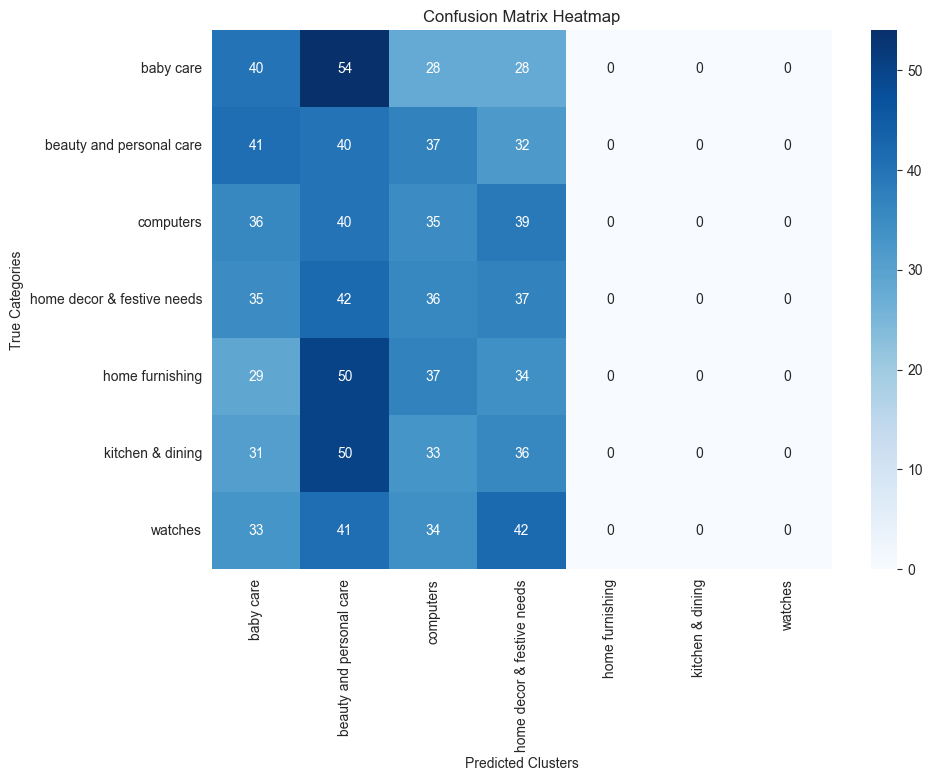

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_images contains the 'label' and 'category' columns
# Create a mapping of labels to category names
label_to_category = dict(zip(df_images['label'], df_images['category']))

# Generate a list of category names ordered by their label
list_labels = [label_to_category[i] for i in sorted(df_images['label'].unique())]

# Convert the confusion matrix to a DataFrame for better readability in the heatmap
df_cm = pd.DataFrame(conf_mat, index=list_labels, columns=list_labels)

# Set up the heatmap plot
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")

# Set the title and labels for better understanding
plt.title("Confusion Matrix Heatmap")
plt.ylabel("True Categories")
plt.xlabel("Predicted Clusters")

# Display the plot
plt.show()


### Synthèse des Observations :

- **Distribution des Clusters** : La heatmap de la matrice de confusion montre que les clusters sont répartis sur plusieurs catégories. Cela signifie que les clusters ne sont pas exclusifs à une seule catégorie, ce qui révèle des difficultés de l'algorithme à distinguer certaines catégories d'images.

- **Prédictions Correctes et Erreurs** : Les valeurs diagonales de la matrice de confusion représentent les prédictions correctes, où les clusters correspondent bien aux catégories. Cependant, les valeurs non nulles hors de la diagonale indiquent des erreurs de classification, où les clusters sont mal attribués aux catégories réelles.

- **Cluster Dominant par Catégorie** : Pour certaines catégories, comme **computers**, un cluster particulier montre une concentration plus importante, suggérant une meilleure performance de clustering. À l'inverse, pour des catégories comme **kitchen & dining** et **watches**, le clustering est plus dispersé, reflétant une performance plus faible.

- **Chevauchement des Clusters** : Le chevauchement observé, où plusieurs clusters se rapportent à une même catégorie, indique que l'algorithme de clustering n'a pas bien séparé les groupes en fonction des caractéristiques extraites des images.

### Conclusion :
- **Correspondance Insuffisante** : Globalement, les clusters ne correspondent pas bien aux catégories d'images, comme le montre la présence de nombreuses valeurs non nulles en dehors de la diagonale. Cette situation appelle à une amélioration soit des méthodes d'extraction des caractéristiques, soit des techniques de clustering utilisées, pour obtenir des résultats plus précis et une meilleure correspondance entre clusters et catégories.